In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

data = pd.read_csv("df.csv")
data.head()


,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical


In [4]:
#Cook vše

formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Cook Distance
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.000046
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,0.037578
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,0.000173
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,0.008283
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,0.000082


In [5]:
#R-squared 0.688
data = data[data['Cook Distance'] < 1]
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     24.76
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.06e-19
Time:                        18:32:50   Log-Likelihood:                -367.74
No. Observations:                  99   AIC:                             753.5
Df Residuals:                      90   BIC:                             776.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0524      5.364     -1.128      0.262     -16.708       4.604
CR             1.4779      1.186      1.246      0.216      -0.878       3.834
DA           -16.4346      9.678     -1.698      0.093     -35.661       2.792
FL             0.8796      1.228      0.716      0.476      -1.561       3.320
OPM           22.9074      7.728      2.964      0.004       7.555      38.260
RT            -0.0003      0.020     -0.013      0.990      -0.040       0.040
TAT            7.9619      2.254      3.533      0.001       3.484      12.440
DE             4.2726      2.560      1.669      0.099      -0.814       9.359
PT            -0.0192      0.093     -0.206      0.837      -0.204       0.166
==============================================================================
Omnibus:                       20.217   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.822
Skew:                           0.649   Prob(JB):                     2.05e-12
Kurtosis:                       6.371   Cond. No.                         640.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#Cook signif
formula_s = "Y ~ OPM + TAT"
mod = smf.ols(formula=formula_s, data=data)
results = mod.fit()
influence = OLSInfluence(results)
data['Cook Distance_s'] = influence.cooks_distance[0]
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Cook Distance,Cook Distance_s
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.000046,0.000370
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,0.037578,0.000002
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,0.000173,0.000506
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,0.008283,0.018416
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,0.000082,0.002476


In [13]:
#R-squared = 0.120 - to asi nebude úplně dobrý model
data = data[data['Cook Distance_s'] < 1]
mod = smf.ols(formula=formula_s, data=data)
res_s = mod.fit()
res_s.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     6.558
Date:                Thu, 16 Nov 2023   Prob (F-statistic):            0.00214
Time:                        18:45:30   Log-Likelihood:                -418.99
No. Observations:                  99   AIC:                             844.0
Df Residuals:                      96   BIC:                             851.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8327      4.303     -0.194      0.847      -9.374       7.709
OPM           16.3267     11.820      1.381      0.170      -7.137      39.790
TAT           12.3435      3.424      3.605      0.000       5.548      19.139
==============================================================================
Omnibus:                       93.205   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              867.514
Skew:                           3.126   Prob(JB):                    4.19e-189
Kurtosis:                      16.085   Cond. No.                         9.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

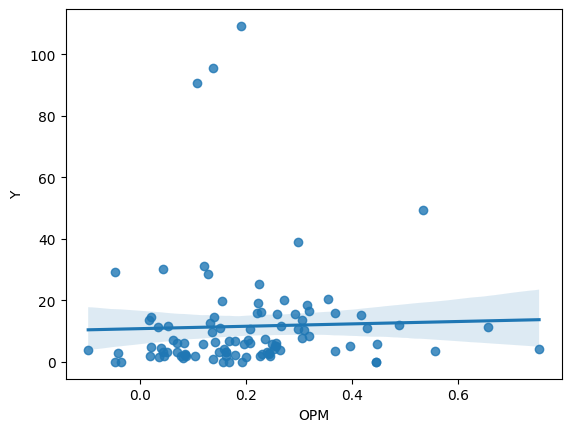

In [23]:
g = sns.regplot(data=data, x="OPM", y="Y")

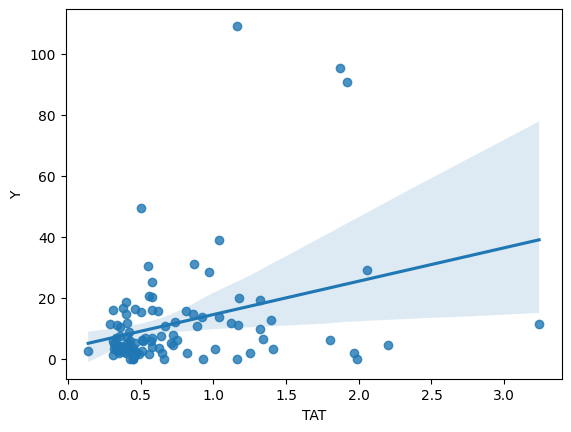

In [24]:
g = sns.regplot(data=data, x="TAT", y="Y")

In [14]:
# odhad ukazatele Y
data["Y_predicted"] = res.predict(data)
data["Y_predicted_signif"] = res_s.predict(data)
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Cook Distance,Cook Distance_s,Y_predicted,Y_predicted_signif
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.000046,0.000370,5.361863,5.361863
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,0.037578,0.000002,6.936713,6.936713
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,0.000173,0.000506,13.042446,13.042446
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,0.008283,0.018416,22.541602,22.541602
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,0.000082,0.002476,13.384773,13.384773


In [16]:
# rozdíl mezi Y a Y_predicted 
data["Y_diff"] = data["Y_predicted"] - data["Y"]
data["Y_diff_s"] = data["Y_predicted_signif"] - data["Y"]
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Cook Distance,Cook Distance_s,Y_predicted,Y_predicted_signif,Y_diff,Y_diff_s
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.000046,0.000370,5.361863,5.361863,3.411863,3.411863
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,0.037578,0.000002,6.936713,6.936713,-0.323287,-0.323287
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,0.000173,0.000506,13.042446,13.042446,5.262446,5.262446
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,0.008283,0.018416,22.541602,22.541602,16.371602,16.371602
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,0.000082,0.002476,13.384773,13.384773,13.384773,13.384773


In [17]:
# nejvyšší hodnota rozdílu
max_diff = data["Y_diff"].max()
max_diff

28.43017974596029

In [18]:
# nejvyšší absolutní hodnota rozdílu
data["Abs_Y_diff"] = abs(data["Y_predicted"] - data["Y"])
abs_max_diff = data["Abs_Y_diff"].max()
abs_max_diff


92.63090134696164

In [19]:
#radek max. rozdil
idx_max_diff = data["Y_diff"].idxmax()
max_diff_row = data.loc[idx_max_diff]
max_diff_row
#predikovaná hodnota Y vyšší než skutečná o 28.43, jiná akcie, než v předchozích dvou modelech

Company                            n2wGj
CR                                   1.0
DA                                  0.14
FL                                  3.37
OPM                               0.0349
RT                                106.52
TAT                                 3.24
DE                                  0.49
Y                                   11.3
PT                                 10.49
Sector                Consumer Defensive
Cook Distance                   0.100108
Cook Distance_s                 0.404261
Y_predicted                     39.73018
Y_predicted_signif              39.73018
Y_diff                          28.43018
Y_diff_s                        28.43018
Abs_Y_diff                      28.43018
Name: 56, dtype: object

In [20]:
#radek max. absolutni rozdil
idx_abs_max_diff = data["Abs_Y_diff"].idxmax()
abs_max_diff_row = data.loc[idx_abs_max_diff]
abs_max_diff_row
# predikovaná hodnota nižší než skutečná, stejná akcie jako v předchozích modelech

Company                            jhFdg
CR                                  1.09
DA                                  0.48
FL                                  24.7
OPM                               0.1913
RT                                 13.43
TAT                                 1.16
DE                                  11.9
Y                                 109.24
PT                                  4.76
Sector                Consumer Defensive
Cook Distance                   0.396365
Cook Distance_s                 0.175731
Y_predicted                    16.609099
Y_predicted_signif             16.609099
Y_diff                        -92.630901
Y_diff_s                      -92.630901
Abs_Y_diff                     92.630901
Name: 45, dtype: object

In [21]:
# nejvyšší hodnota rozdílu (jen signifikantní proměnné) - stejný výsledek jako pro dataset se všemi proměnnými
max_diff_s = data["Y_diff_s"].max()
max_diff_s

28.43017974596029

In [22]:
# nejvyšší absolutní hodnota rozdílu (jen sifnifikantní proměnné) - stejný výsledek jako pro dataset se všemi proměnnými
data["Abs_Y_diff_s"] = abs(data["Y_predicted_signif"] - data["Y"])
abs_max_diff = data["Abs_Y_diff"].max()
abs_max_diff

92.63090134696164